In [1]:
from astropy.io import ascii
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
c = ascii.read("../data/mmsf2outcube_COSMOSC_allifu.cat")

In [3]:
np.unique(c["class2"])

NA
agn
bad
check
filament
gal
halo
junk
pointsource


In [4]:
ii = c["class2"] == 'halo'
jj = c["class2"] == 'pointsource'
ww = c["class2"] == 'filament'
aa = c["class2"] == 'agn'

In [5]:
np.sum(aa)

15

In [6]:
c.colnames

['ifu',
 'id',
 'N',
 'counts',
 'flux',
 'ra_com',
 'dec_com',
 'ddec',
 'dra',
 'x_com',
 'y_com',
 'z_com',
 'dx',
 'dy',
 'dz',
 'sqrt(ev1)',
 'sqrt(ev2)',
 'size2d',
 'x_ext',
 'y_ext',
 'z_ext',
 'wl_com',
 'dwl',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'zmin',
 'zmax',
 'class',
 'manualx',
 'manualy',
 'manualz',
 'class2',
 'comment2']

(1e-18, 1e-15)

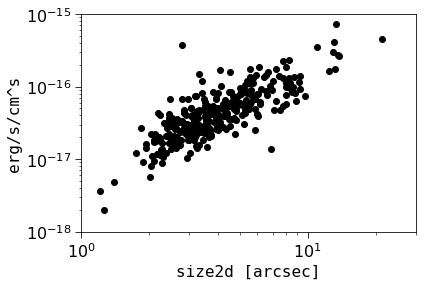

In [7]:
plt.plot( c["size2d"][ii], c["flux"][ii],'o')
plt.ylabel("erg/s/cm^s")
plt.xlabel("size2d [arcsec]")
plt.xscale("log")
plt.yscale("log")
plt.xlim([1,30])
plt.ylim([1e-18,1e-15])

(1e-18, 1e-15)

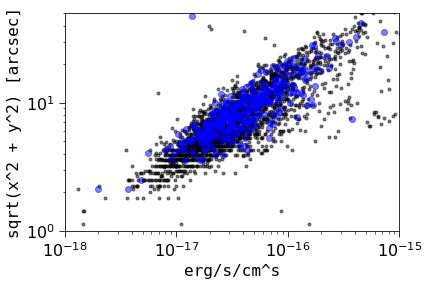

In [8]:

size = np.sqrt( c["x_ext"]**2. + c["y_ext"]**2.)*.5
plt.plot( c["flux"][~ii], size[~ii],'.', alpha=.5)
plt.plot( c["flux"][ii], size[ii],'o', alpha=.5)
plt.xlabel("erg/s/cm^s")
plt.ylabel("sqrt(x^2 + y^2) [arcsec]")
plt.xscale("log")
plt.yscale("log")
plt.ylim([1,50])
plt.xlim([1e-18,1e-15])

(1e-18, 1e-15)

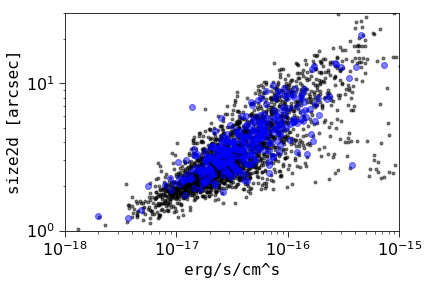

In [9]:
plt.plot( c["flux"][~ii], c["size2d"][~ii],'.', alpha=.5)
plt.plot( c["flux"][ii], c["size2d"][ii],'o', alpha=.5)
plt.xlabel("erg/s/cm^s")
plt.ylabel("size2d [arcsec]")
plt.xscale("log")
plt.yscale("log")
plt.ylim([1,30])
plt.xlim([1e-18,1e-15])

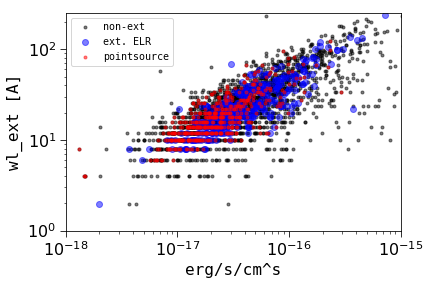

In [10]:
plt.plot( c["flux"][~ii], c["dwl"][~ii],'.', alpha=.5, label='non-ext')
plt.plot( c["flux"][ii], c["dwl"][ii],'bo', alpha=.5, label='ext. ELR')
plt.plot( c["flux"][jj], c["dwl"][jj],'r.', alpha=.5, label='pointsource')

plt.xlabel("erg/s/cm^s")
plt.ylabel("wl_ext [A]")
plt.xscale("log")
plt.yscale("log")
plt.ylim([1,250])
plt.xlim([1e-18,1e-15])
plt.legend()

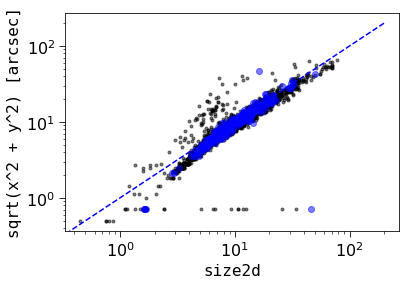

In [11]:
plt.plot( c["size2d"][~ii]*2.35, size[~ii],'.', alpha=.5)
plt.plot( c["size2d"][ii]*2.35, size[ii],'bo', alpha=.5)
plt.xlabel("size2d")
plt.ylabel("sqrt(x^2 + y^2) [arcsec]")
plt.xscale("log")
plt.yscale("log")
plt.plot([0,200],[0,200],'--')
#plt.ylim([1,250])
#plt.xlim([1e-18,1e-15])

/Users/mxhf/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


(1e-17, 1e-15)

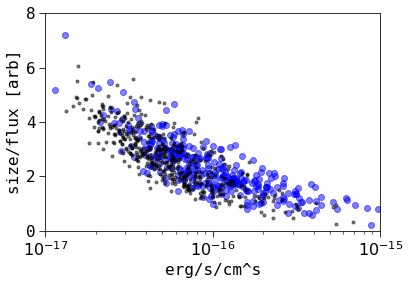

In [12]:
plt.plot( c["flux"][ii]*2.35, size[ii]/(c["flux"][ii]*1e17),'bo', alpha=.5)
plt.plot( c["flux"][jj]*2.35, size[jj]/(c["flux"][jj]*1e17),'k.', alpha=.5)

#plt.plot( c["size2d"][ii]*2.35, size[ii],'bo', alpha=.5)
#plt.xlabel("size2d")
plt.ylabel("size/flux [arb]")
plt.xlabel("erg/s/cm^s")
plt.xscale("log")
#plt.yscale("log")
#plt.plot([0,200],[0,200],'--')
plt.ylim([-0,8])
plt.hist([c["wl_com"][ii]/1216.-1., c["wl_com"][jj]/1216.-1., c["wl_com"][ww]/1216.-1.], bins=np.arange(1.85,3.,.05))
plt.xlim([1e-17,1e-15])

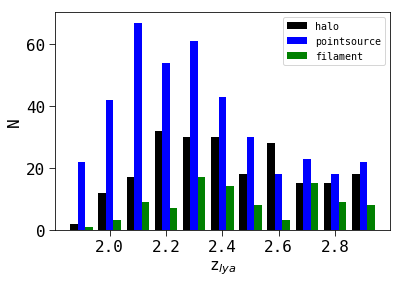

In [18]:
#plt.hist([c["wl_com"][ii]/1216.-1.], bins=np.arange(1.85,3.,.05))

plt.hist([c["wl_com"][ii]/1216.-1., c["wl_com"][jj]/1216.-1., c["wl_com"][ww]/1216.-1.], \
         bins=np.arange(1.85,3.,.1),label=['halo','pointsource','filament'])
plt.xlabel("z$_{lya}$")
plt.ylabel("N")
plt.legend()
#print(a)

In [103]:
c["wl_com"]/1216.-1.

1.89
1.97
2.06
2.08
2.13
2.16
2.23
2.93
3.39
3.44
3.43
